## 한글설치

In [1]:
from matplotlib import rc, font_manager as fm

# 나눔고딕 폰트 경로 설정
font_path = '../나눔고딕/NanumFontSetup_TTF_GOTHIC/NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()

# 폰트 설정
rc('font', family=font_name)

실루엣 비주얼라이즈 + 실루엣 + 엘보우

In [2]:
import pandas as pd
df = pd.read_csv('data/for_k_means.csv')
df.head()

,자치구,PET 총량,PET 량(공공처리),PET 량(위탁),CAN 총량,CAN 량(공공처리),CAN 량(위탁),구별_총생활인구수_평균,구별_연령대0_생활인구_평균,구별_연령대10_생활인구_평균,...,구별_연령대60_거주인구_평균,구별_연령대70_거주인구_평균,구별_연령대80_거주인구_평균,구별_연령대90_거주인구_평균,수거함개수,투명,캔 & 투명,1인가구_비율,수거함당_평균_거주인구수,구별_연령대_거주인구_평균_합
0,종로구,738.6,219.3,519.3,443.5,138.9,304.6,2.451027e+08,6.419989e+06,1.145135e+07,...,1189.957219,699.631016,355.770053,57.299465,9,4,5,0.409814,956.259655,8606.336898
1,중구,712.8,565.9,146.9,484.4,373.3,111.1,1.822054e+08,3.481593e+06,5.243441e+06,...,1190.200000,693.096970,324.642424,55.496970,7,4,3,0.414315,1174.990476,8224.933333
2,용산구,973.0,764.8,208.2,469.9,301.8,168.1,1.748011e+08,8.302748e+06,1.115811e+07,...,1814.647727,1027.750000,534.681818,90.011364,1,1,0,0.385426,14136.437500,14136.437500
3,성동구,1671.3,1149.5,521.8,931.7,454.6,477.1,1.869606e+08,1.293545e+07,1.313938e+07,...,2195.074866,1194.069519,518.465241,67.577540,10,5,5,0.348537,1700.797861,17007.978610
4,광진구,1315.5,0.0,1315.5,552.8,0.0,552.8,2.069475e+08,1.281745e+07,1.810854e+07,...,2903.733333,1472.460606,612.975758,81.963636,7,4,3,0.409654,3260.165368,22821.157576


C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kme

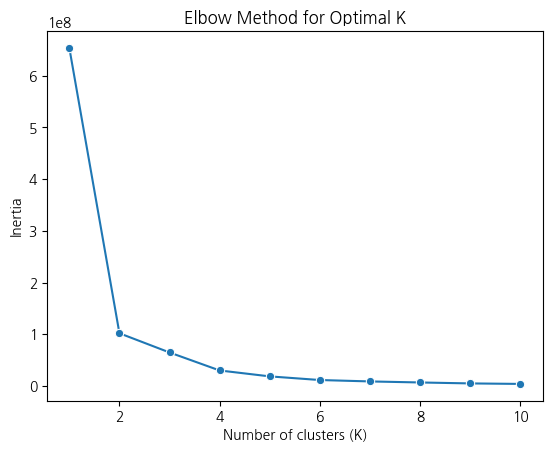

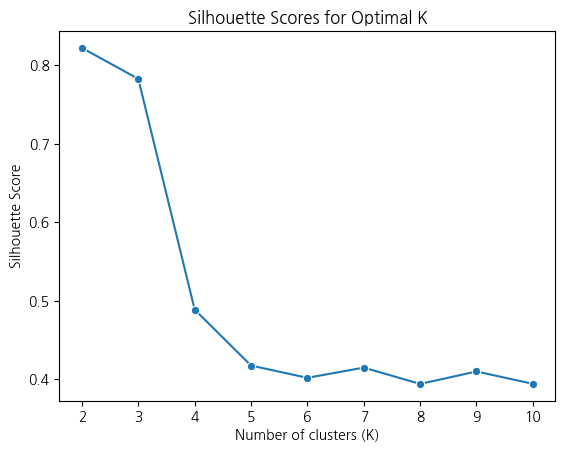

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


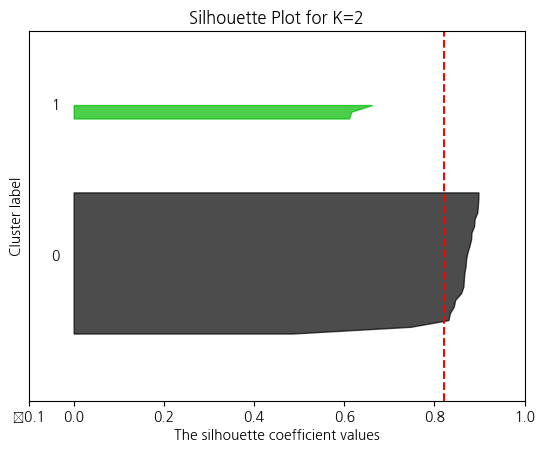

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


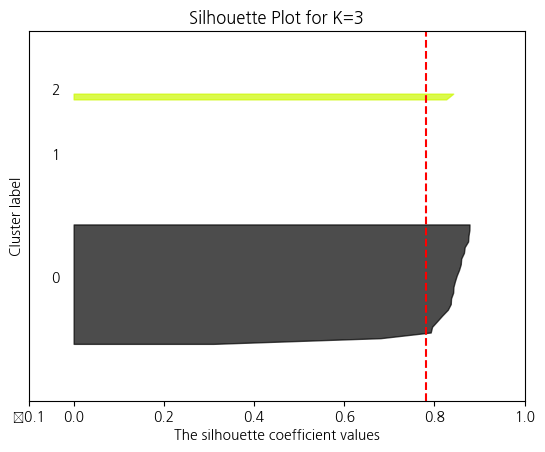

In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to visualize silhouette scores
def visualize_silhouette(X, cluster_labels):
    silhouette_avg = silhouette_score(X, cluster_labels)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    
    fig, ax1 = plt.subplots()
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (k + 1) * 10])
    
    for i in range(k):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
    
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([]) 
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# Select columns for clustering
selected_cols = ['PET 총량', 'CAN 총량', '1인가구_비율','수거함당_평균_거주인구수']
X = df[selected_cols]

# K values range
k_range = range(1, 11)

# Inertia
inertia = []

# Silhouette scores
silhouette_scores = []

# K-means clustering
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

    if k > 1:  # Silhouette score is not defined for a single cluster
        labels = kmeans.labels_
        silhouette_avg = silhouette_score(X, labels)
        silhouette_scores.append(silhouette_avg)

# Elbow
fig, ax = plt.subplots()
sns.lineplot(x=k_range, y=inertia, marker='o', ax=ax)
ax.set(xlabel='Number of clusters (K)', ylabel='Inertia', title='Elbow Method for Optimal K')
plt.show()

# Silhouette scores plot
fig, ax = plt.subplots()
sns.lineplot(x=k_range[1:], y=silhouette_scores, marker='o', ax=ax)
ax.set(xlabel='Number of clusters (K)', ylabel='Silhouette Score', title='Silhouette Scores for Optimal K')
plt.show()

# Visualize silhouette scores for k=2 and k=3
for k in [2, 3]:
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    visualize_silhouette(X, cluster_labels)
    plt.title(f'Silhouette Plot for K={k}')
    plt.show()
